### Clustering NBA players

In [1]:
#import libraries
import matplotlib.pyplot as plt, pandas as pd, numpy as np, matplotlib as mpl, requests, time

%matplotlib inline
pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df = pd.read_csv('advanced2016.csv',header=0)

In [3]:
df.head()

,﻿ID,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,abrinal01,SG,23,OKC,68,1055,10.1,0.560,0.724,0.144,...,8.3,15.9,1.2,0.9,2.1,0.095,-0.3,-2.2,-2.5,-0.1
1,acyqu01,PF,26,TOT,38,558,11.8,0.565,0.529,0.353,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.8,-1.2,-3.0,-0.1
2,acyqu01,PF,26,DAL,6,48,-1.4,0.355,0.412,0.176,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.1,-6.0,-16.2,-0.2
3,acyqu01,PF,26,BRK,32,510,13.1,0.587,0.542,0.373,...,9.6,16.5,0.6,0.5,1.1,0.102,-1.1,-0.7,-1.8,0.0
4,adamsst01,C,23,OKC,80,2389,16.5,0.589,0.002,0.392,...,16.0,16.2,3.3,3.1,6.4,0.130,-0.7,1.2,0.5,1.5


In [4]:
df.columns

Index(['﻿ID', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [5]:
df = df[df['MP']>600]

In [6]:
df = df[df['G']>45]

In [7]:
df.drop_duplicates(['﻿ID'], keep='last',inplace=True)

In [8]:
df = df.fillna(0)

In [9]:
saveIDs = df['﻿ID']

In [10]:
df = df.drop(['﻿ID','MP','Tm','G','WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP','Age'],axis=1)

In [11]:
df.head()

,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS
0,SG,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9
4,C,16.5,0.589,0.002,0.392,13.0,15.5,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1
5,SG,9.0,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.4,8.4,14.4,1.2,0.2
8,PF,18.6,0.532,0.053,0.258,8.6,16.6,12.7,9.9,1.0,3.1,7.7,24.5,3.5,3.7
9,PF,11.6,0.485,0.006,0.196,13.7,14.6,14.2,9.1,1.0,2.4,13.7,10.9,0.9,0.8


In [12]:
import sklearn.preprocessing as pps
label = pps.LabelEncoder()
df['Pos'] = label.fit_transform(df['Pos'])

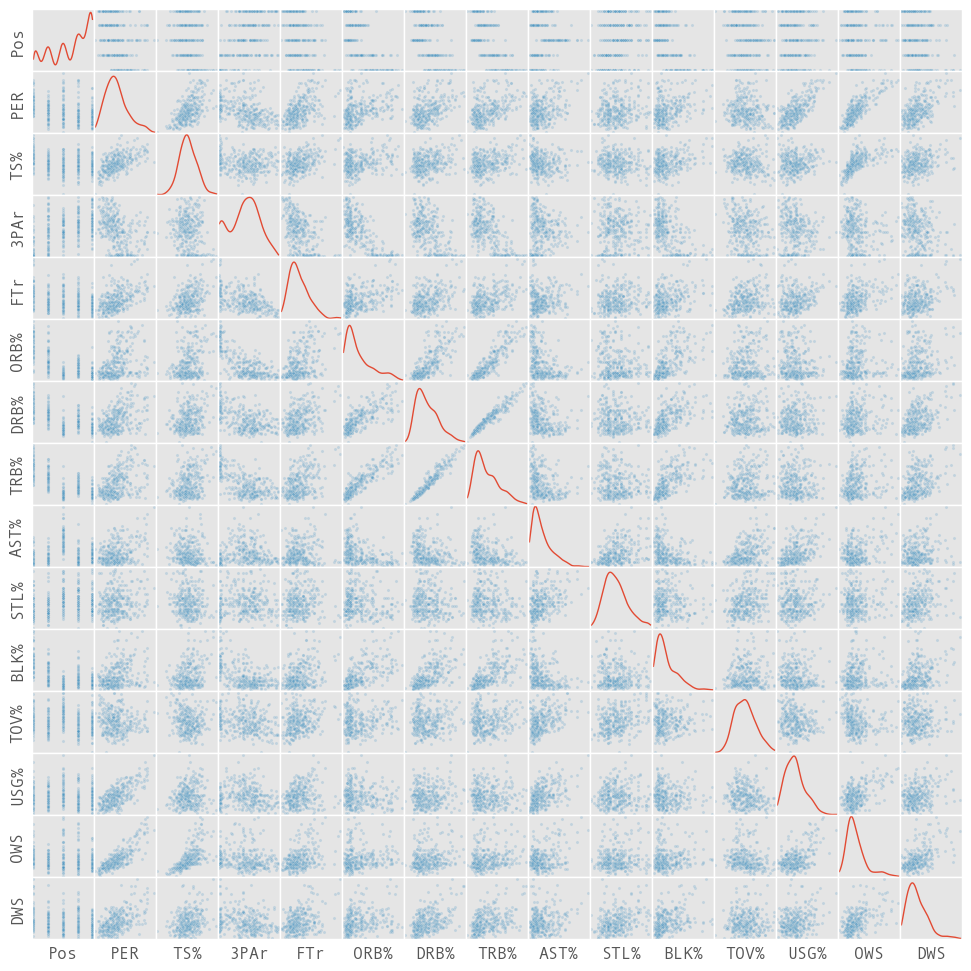

In [13]:
#this shows kernel density 
axs = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde');
[ax.set_yticks([]) for ax in axs[:,0]] 
[ax.set_xticks([]) for ax in axs[-1,:]];

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [22]:
# scale data
X = df.as_matrix() 
X = scale(X)

In [23]:
# reduce dimensionality
pca = PCA() 
pca.fit(X) 
# find amount of variance explained by each component
var_expl = pca.explained_variance_ratio_ 
tot_var_expl = np.array([sum(var_expl[0:i+1]) for i,x in enumerate(var_expl)])

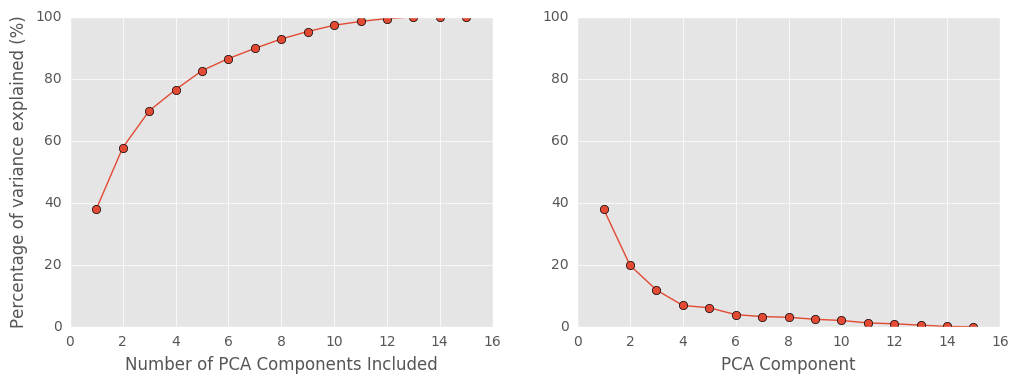

In [24]:
#create cumulative proportion of variance plot
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
plt.plot(range(1,len(tot_var_expl)+1), tot_var_expl*100,'o-')
plt.axis([0, len(tot_var_expl)+1, 0, 100])
plt.xlabel('Number of PCA Components Included')
plt.ylabel('Percentage of variance explained (%)')

plt.subplot(1,2,2) 
plt.plot(range(1,len(var_expl)+1), var_expl*100,'o-')
plt.axis([0, len(var_expl)+1, 0, 100])
plt.xlabel('PCA Component');

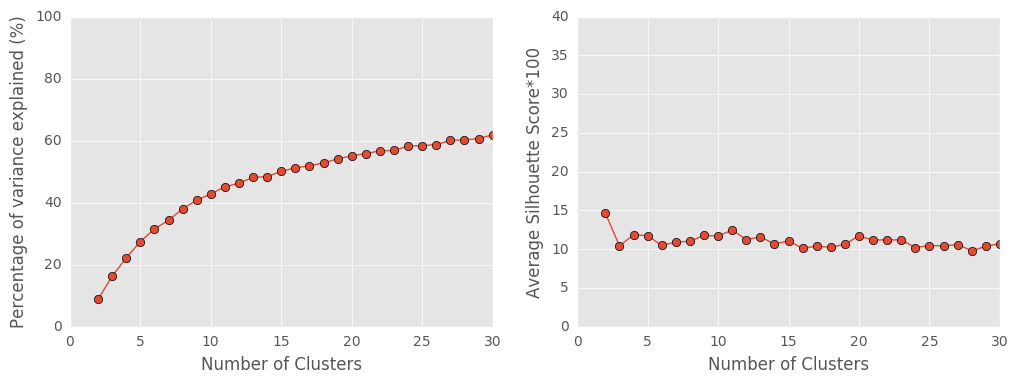

In [25]:
#http://stackoverflow.com/questions/6645895/calculating-the-percentage-of-variance-measure-for-k-means reference

from scipy.spatial.distance import cdist, pdist, euclidean
from sklearn.cluster import KMeans
from sklearn import metrics

#transform data into the # of  PCA components space
reduced_data = PCA(n_components=9, whiten=True).fit_transform(X) 
#kmeans assumes clusters have equal variance, and whitening helps keep this assumption.

k_range = range(2,16) 
k_means_var = [KMeans(n_clusters=k).fit(reduced_data) for k in k_range] 

#get labels and calculate silhouette score
labels = [i.labels_ for i in k_means_var]
sil_score = [metrics.silhouette_score(reduced_data,i,metric='euclidean') for i in labels]

#get the center of each cluster
centroids = [i.cluster_centers_ for i in k_means_var] 

#calculate distance between each item and each cluster center
k_euclid = [cdist(reduced_data,cent,'euclidean') for cent in centroids]
#get the distance between each item and its cluster
dist = [np.min(ke,axis=1) for ke in k_euclid] 

wcss = [sum(d**2) for d in dist] 
 #total sum of squares
tss = sum(pdist(reduced_data)**2/reduced_data.shape[0])
#between cluster sum of squares
bss = tss-wcss 

plt.clf()
plt.figure(figsize=(12,4)) #create cumulative proportion of variance plot
plt.subplot(1,2,1)
plt.plot(k_range, bss/tss*100,'o-')
plt.axis([0, np.max(k_range), 0, 100])
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of variance explained (%)');

plt.subplot(1,2,2) #create scree plot
plt.plot(k_range, np.transpose(sil_score)*100,'o-')
plt.axis([0, np.max(k_range), 0, 40])
plt.xlabel('Number of Clusters');
plt.ylabel('Average Silhouette Score*100');

In [26]:
final_fit = KMeans(n_clusters=15).fit(reduced_data)

In [27]:
df['kmeans_label'] = final_fit.labels_

In [28]:
df['PLAYER_ID'] = saveIDs

In [29]:
df.head()

,Pos,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,kmeans_label,PLAYER_ID
0,4,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,1.7,0.6,8.3,15.9,1.2,0.9,14,abrinal01
4,0,16.5,0.589,0.002,0.392,13.0,15.5,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,13,adamsst01
5,4,9.0,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.4,8.4,14.4,1.2,0.2,14,afflaar01
8,1,18.6,0.532,0.053,0.258,8.6,16.6,12.7,9.9,1.0,3.1,7.7,24.5,3.5,3.7,11,aldrila01
9,1,11.6,0.485,0.006,0.196,13.7,14.6,14.2,9.1,1.0,2.4,13.7,10.9,0.9,0.8,13,allenla01


In [30]:
names = pd.read_csv('advanced2016c.csv',header=0)

In [31]:
names.head()

,﻿Rk,Player,ID,Pos,Age,Tm,G,MP,PER,TS%,...,Unnamed: 20,OWS,DWS,WS,WS/48,Unnamed: 25,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,abrinal01,SG,23,OKC,68,1055,10.1,0.560,...,NaN,1.2,0.9,2.1,0.095,NaN,-0.3,-2.2,-2.5,-0.1
1,2,Quincy Acy,acyqu01,PF,26,TOT,38,558,11.8,0.565,...,NaN,0.5,0.5,0.9,0.082,NaN,-1.8,-1.2,-3.0,-0.1
2,2,Quincy Acy,acyqu01,PF,26,DAL,6,48,-1.4,0.355,...,NaN,-0.2,0.0,-0.1,-0.133,NaN,-10.1,-6.0,-16.2,-0.2
3,2,Quincy Acy,acyqu01,PF,26,BRK,32,510,13.1,0.587,...,NaN,0.6,0.5,1.1,0.102,NaN,-1.1,-0.7,-1.8,0.0
4,3,Steven Adams,adamsst01,C,23,OKC,80,2389,16.5,0.589,...,NaN,3.3,3.1,6.4,0.130,NaN,-0.7,1.2,0.5,1.5


In [32]:
df['ID'] = df['PLAYER_ID']

In [33]:
df = df.drop(['PLAYER_ID'],axis=1)

In [34]:
testdf = names[['ID','Player']]

In [35]:
x =pd.merge(df, testdf, on='ID')

In [36]:
x.drop_duplicates(['ID'], keep='last',inplace=True)

In [62]:
x.to_csv('clustered.csv')

### Summary

In the NBA, players are grouped into 5 different positions: Point Guard, Shooting Guard, Small Forward, Power Forward and Center. However, every player has a unique style of play. I decided to use Kmeans Clustering to predict the type of player based on NBA Advanced statistics through the 2016-2017 season. I first ran PCA to reduce the dimensionality, and from that, I determined the optimal number of PCA components to use. I then ran the Kmeans Algorithm, and used silhouette scores to find the best number of clusters to use. Based on the graph I plotted, the best number of clusters was 15 because the score and the percentage of variance explained seemed to be the right combination. Some examples of cluster results are below. I would say they look fairly accurate, though there are some discrepancies. 

    1) Defensive and Balanced Players: Nicolas Batum, Evan Turner, Marcus Smart
    2) Scoring Big Men: Clint Capela, Enes Kanter, Kevin Love, Jusuf Nurkic
    3) All-around All Stars: Giannis Antetokounmpo, DeMarcus Cousins, Paul George, John Wall
    4) High Volume Scorers: Carmelo Anthony, Klay Thompson, Harrison Barnes, Brook Lopez
    5) Balanced Guards: Dwyane Wade, Tony Parker, Derrick Rose
    6) Sixth Man: Shaun Livingston, C.J. Watson, Mike Muscala
    7) Scoring Paint Protectors: Rudy Gobert, Hassan Whiteside, Karl-Anthony Towns, Anthony Davis
    8) Scoring All Stars: DeMar DeRozan, Isaiah Thomas, Damian Lillard, Kyrie Irving
    9) Big Body Rebounders: Pau Gasol, Zaza Pachulia, Nerlens Noel
    10) Top 10 Elite Players: Stephen Curry, Kevin Durant, Kawhi Leonard, LeBron James
    11) Elite 3 and D Players: Patrick Beverley, Draymond Green, P.J. Tucker
    12) 3-point Specialists: Kyle Korver, J.J. Redick, Ryan Anderson
    13) Rising Young Players: Devin Booker, Jordan Clarkson, Andrew Wiggins
    14) Bench Role Players: Shabazz Napier, Ron Baker, Tim Frazier 
    15) Versatile Players: Markieff Morris, Joe Johnson, Al Horford, Serge Ibaka